<a href="https://colab.research.google.com/github/DiDevv/curso_intro_ao_tensor_flow/blob/main/Celcius_para_Fahrenheit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objetivo**

----
O objetivo desse colab é construir uma rede simples que deduza a equação para transformar graus Celsius em Fahrenheit:

$$ f = c \times 1.8 + 32 $$

Leituras recomendadas por mim (Diogo):

- [O que é gradiente descendente?](https://www.ibm.com/br-pt/topics/gradient-descent#:~:text=O%20gradiente%20descendente%20%C3%A9%20um,resultados%20previstos%20e%20os%20reais.):
Esse artigo da IBM trata do Gradiente Descendente **(e seus tipos)** (algoritmo usado para minimizar o erro), Taxa de Aprendizado e Função de Perda e Função de Custo.

- [Erro quadrático médio](https://en.wikipedia.org/wiki/Mean_squared_error): Discute sobre o método MSE para cálcular o erro.

- [Introdução ao modelo de Otimização Adam](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/): Esse modelo é muito utilizado para processamento de linguagem natural e processamento de imagens.


----

Importando Bibliotecas

In [ ]:
import tensorflow as tf
#Filtrar mensagens apenas de ERRO
logger = tf.get_logger()
logger.setLevel('ERROR')

import numpy as np
import matplotlib.pyplot as plt

---
Criando o conjunto de dados de entrada como um array unidimensional

In [ ]:
celsius = np.array([-15, -10, 0, 5, 10, 28, 35], dtype=float)
fahrenheit = np.array([5, 14, 32, 41, 50, 82.4, 95], dtype=float)

# A função enumerate não só percorre, como também "captura" o valor do item
# no index do array
for i, c in enumerate(celsius):
    print("{} graus Celsius = {} graus Fahrenheit".format(c, fahrenheit[i]))

-15.0 graus Celsius = 5.0 graus Fahrenheit
-10.0 graus Celsius = 14.0 graus Fahrenheit
0.0 graus Celsius = 32.0 graus Fahrenheit
5.0 graus Celsius = 41.0 graus Fahrenheit
10.0 graus Celsius = 50.0 graus Fahrenheit
28.0 graus Celsius = 82.4 graus Fahrenheit
35.0 graus Celsius = 95.0 graus Fahrenheit


## Criação do Modelo

A **Rede Neural com camadas Densas** se parece com isso:
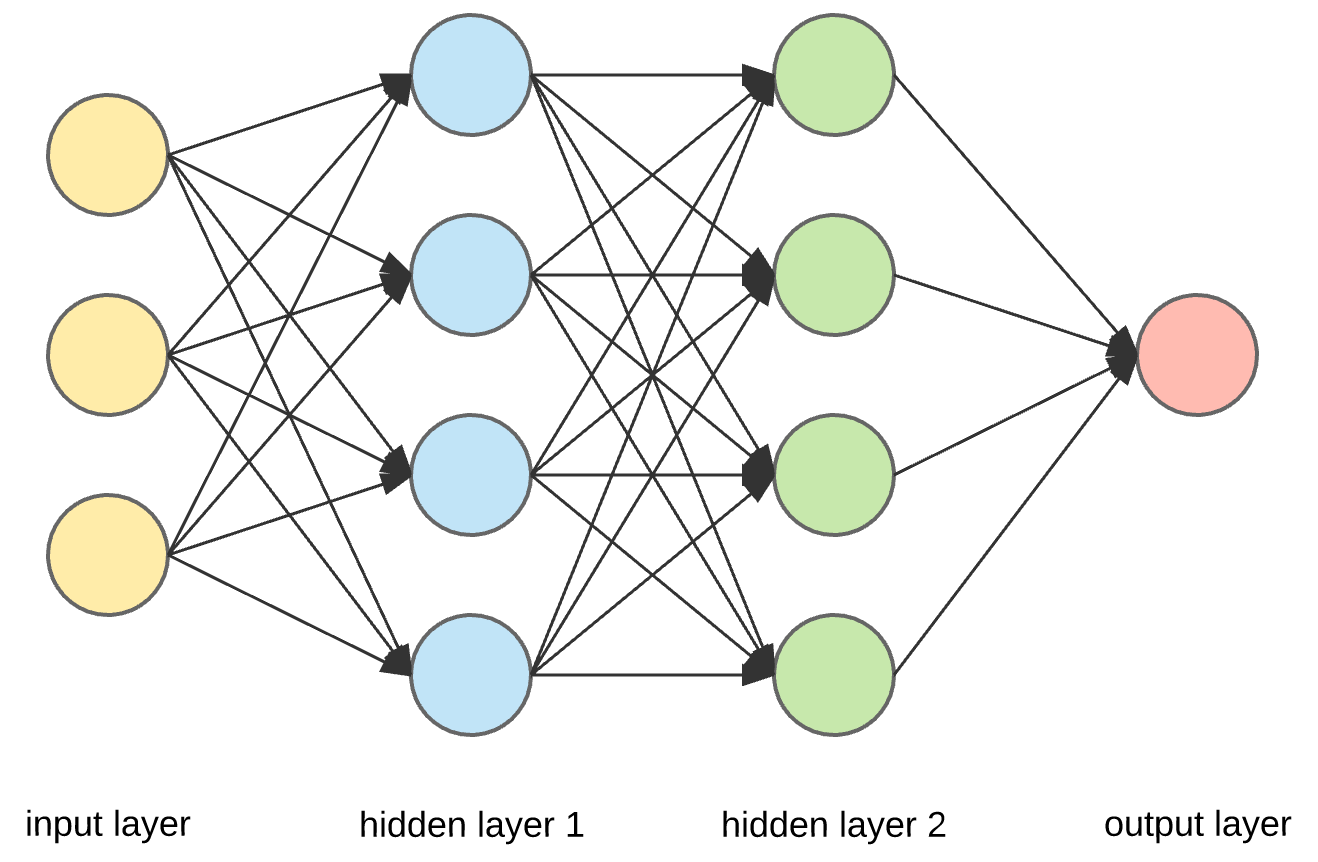


Porém, por se tratar de um problema simples, será utilizada **apenas uma camada com um único neurônio**.

----
- **units** - Quantidade de neurônios na camada.

- **input_shape=[1]** - Define a forma dos dados de entrada esperados pela camada. No caso de Redes Neurais densas, as entradas esperadas são vetores ou matrizes. 1, significa que a entrada será um vetor unidimensional.

In [ ]:
camada0 = tf.keras.layers.Dense(units=1, input_shape=[1])

## Montando camadas no Modelo

In [ ]:
model = tf.keras.Sequential([camada0])

> Também é muito comum ver as camadas sendo montadas dentro da função Sequential

In [ ]:
#model = tf.keras.Sequential([
#    tf.keras.layers.Dense(units=1, input_shape=[1])
#])

## Compilação do modelo contendo função de perda e funções de otimização

- **Função de perda ou Loss Function** - Uma forma de medir o quão próximo do ideal nossas predições estão. (Por exemplo: Método dos Mínimos Quadrados, log, dentre outros)
> Obs: **função de perda se refere ao erro de um exemplo de treinamento**, já a **função de custo calcula o erro médio em todo um conjunto de treinameno**.


- **Função de Otimização ou Optmizer Functions** - Funções para mitigar e reduzir os erros.

In [ ]:
def treinar_modelo(taxa_aprendizado):
    model.compile(loss='mean_squared_error',
                  optimizer=tf.keras.optimizers.Adam(taxa_aprendizado))

    history = model.fit(celsius, fahrenheit, epochs= 500, verbose=0)

    plt.xlabel('Epoca')
    plt.ylabel('Perda')
    plt.plot(history.history['loss'])

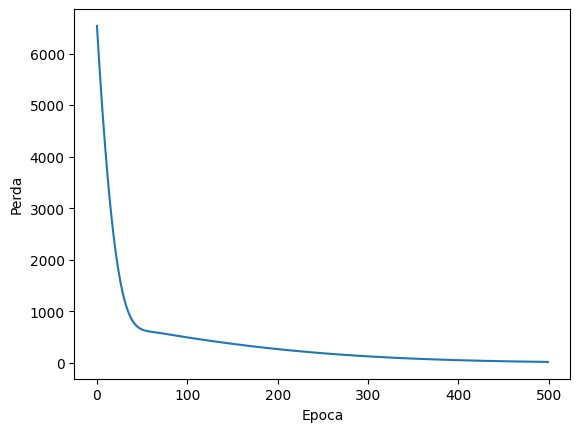

In [ ]:
treinar_modelo(0.1)

Nesse caso, estamos utilizando o Otimizador Adam, com uma taxa de aprendizado de 0.1 (alta taxa de aprendizado). A taxa de aprendizado pode ser explorada e experimentada. Altas taxas de aprendizado tendem a treinar o modelo mais rápido, mas, por se tratar de um problema de otimização, quando a taxa de aprendizado é muito alta pode ocorrer problemas para encontrar o mínimo global (onde a função de perda é mais baixa) e consequentemente convergindo o modelo. Geralmente a taxa de aprendizado mais usada para o Adam é 0.001. Uma taxa de aprendizado mais baixa, exige muito mais épocas para ser de fato eficaz.
Existem técnicas (pesquisar mais pra frente) para otimizar essa busca pela taxa de aprendizado ideal.

## Predizendo novos valores

In [ ]:
print(model.predict([100]))

1/1 [==============================] - 0s 70ms/step
[[217.95023]]


In [ ]:
print(model.predict([-40]))

1/1 [==============================] - 0s 45ms/step
[[-49.190224]]


In [ ]:
print("Os pesos da camada: {}".format(camada0.get_weights()))

Os pesos da camada: [array([[1.908146]], dtype=float32), array([27.13562], dtype=float32)]


Podemos observar que o valor da primeira variável é próximo de 1.8, o da segunda é próximo a 32.

$$ f = c \times 1.8 + 32 $$

## Criando mais camadas

In [ ]:
camada0 = tf.keras.layers.Dense(units=4, input_shape=[1])
camada1 = tf.keras.layers.Dense(units=4)
camada2 = tf.keras.layers.Dense(units=1)
model = tf.keras.Sequential([camada0, camada1, camada2])
model.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss='mean_squared_error')
model.fit(celsius, fahrenheit, epochs=500, verbose=False)
print("O treinamento do modelo foi concluído")

O treinamento do modelo foi concluído


In [ ]:
print(model.predict([100]))

1/1 [==============================] - 0s 84ms/step
[[211.99998]]


In [ ]:
print("Pesos camada 0: {}".format(camada0.get_weights()))
print("Pesos camada 1: {}".format(camada1.get_weights()))
print("Pesos camada 2: {}".format(camada2.get_weights()))

Pesos camada 0: [array([[ 0.4878885 ,  0.4909095 , -0.35143474,  0.48868862]],
      dtype=float32), array([-1.6440462,  3.3370218, -2.9891753,  0.8063561], dtype=float32)]
Pesos camada 1: [array([[-0.21660471,  0.6180952 ,  0.11326568, -1.5386307 ],
       [ 1.4762036 , -0.09869034, -0.2651738 ,  1.332566  ],
       [-1.5818617 ,  0.52038246,  0.13945934, -0.42792097],
       [-0.21203755,  0.8277968 ,  0.30448484, -0.03239098]],
      dtype=float32), array([ 3.1011996,  0.3635321, -1.5952642,  2.8887327], dtype=float32)]
Pesos camada 2: [array([[1.5530382 ],
       [0.21811494],
       [0.00589231],
       [0.8548305 ]], dtype=float32), array([2.8227427], dtype=float32)]


Com mais camadas o modelo convergiu em um resultado melhor, mas, quando observamos os pesos, foi atribuida uma complexidade mais alta. Ou seja, ele não usou a função $$ f = c \times 1.8 + 32 $$ para chegar no resultado.